<a href="https://colab.research.google.com/github/Ashi743/my_projects-/blob/main/credit_card_odin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"

In [27]:
data= pd.read_csv("Credit_card.csv")

In [28]:
data_label= pd.read_csv("Credit_card_label.csv")
data_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [29]:
data["Type_Occupation"].replace(np.nan, "other", inplace=True)

In [30]:
# Select only numeric columns for calculating the mean
numeric_data = data.select_dtypes(include=np.number)

# Calculate the mean of numeric columns
data_mean = numeric_data.mean()

# Fill NaN values in the original DataFrame using the mean of numeric columns
data.fillna(data_mean, inplace=True)

In [31]:
data["GENDER"].fillna(data["GENDER"].mode()[0], inplace=True)

In [32]:
merged_data= pd.merge(data, data_label, on="Ind_ID")


In [33]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1


In [34]:
merged_data.isnull().sum()

,0
Ind_ID,0
GENDER,0
Car_Owner,0
Propert_Owner,0
CHILDREN,0
Annual_income,0
Type_Income,0
EDUCATION,0
Marital_status,0
Housing_type,0


In [35]:
merged_data['Birth_year'] = -1*(merged_data['Birthday_count'] / 365.25)


In [36]:
merged_data['Employment_years'] = np.where(
    merged_data['Employed_days'] > 0,
    0,
    -1*(merged_data['Employed_days'] / 365)
)


In [37]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Birth_year,Employment_years
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,other,2,1,51.394935,0.000000
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,other,2,1,37.117043,1.605479
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,other,2,1,43.916063,1.605479
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,other,2,1,37.117043,1.605479
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,other,2,1,37.117043,1.605479


In [38]:
merged_data["Family"]= merged_data["Family_Members"] + merged_data["CHILDREN"]

In [39]:
merged_data_1 = merged_data[['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner','Family','Type_Occupation','Employment_years',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birth_year', 'Employed_days','Work_Phone', 'Mobile_phone',
       'Phone', 'EMAIL_ID', 'label' ]]

In [40]:
merged_data_1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Family,Type_Occupation,Employment_years,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birth_year,Employed_days,Work_Phone,Mobile_phone,Phone,EMAIL_ID,label
0,5008827,M,Y,Y,2,other,0.000000,180000.00000,Pensioner,Higher education,Married,House / apartment,51.394935,365243,0,1,0,0,1
1,5009744,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1
2,5009746,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,43.916063,-586,1,1,1,0,1
3,5009749,F,Y,N,2,other,1.605479,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1
4,5009752,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1


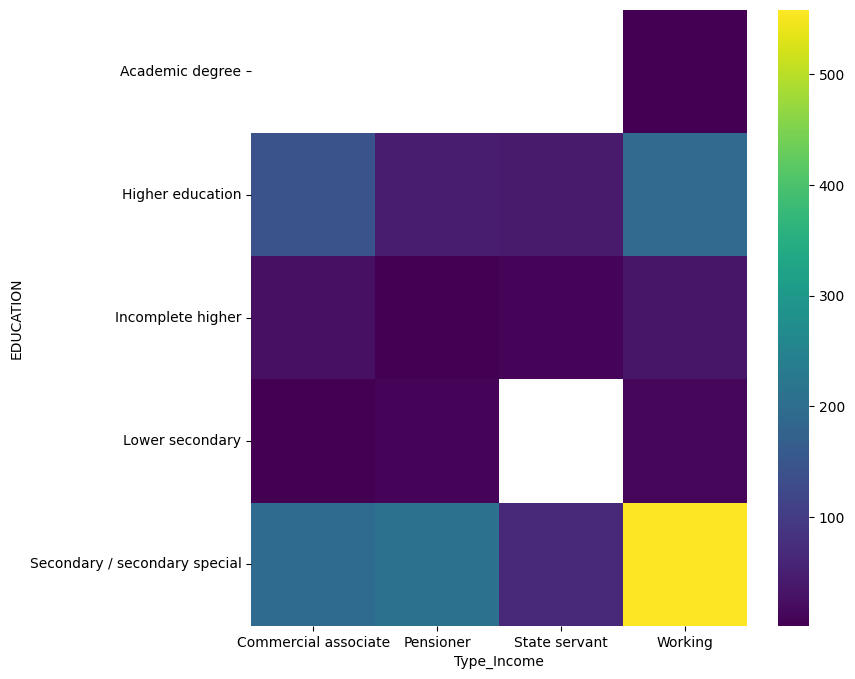

In [41]:
# @title Type_Income vs EDUCATION

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['EDUCATION'].value_counts()
    for x_label, grp in merged_data_1.groupby('Type_Income')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Type_Income')
_ = plt.ylabel('EDUCATION')

In [42]:
merged_data_1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'Family',
       'Type_Occupation', 'Employment_years', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birth_year',
       'Employed_days', 'Work_Phone', 'Mobile_phone', 'Phone', 'EMAIL_ID',
       'label'],
      dtype='object')

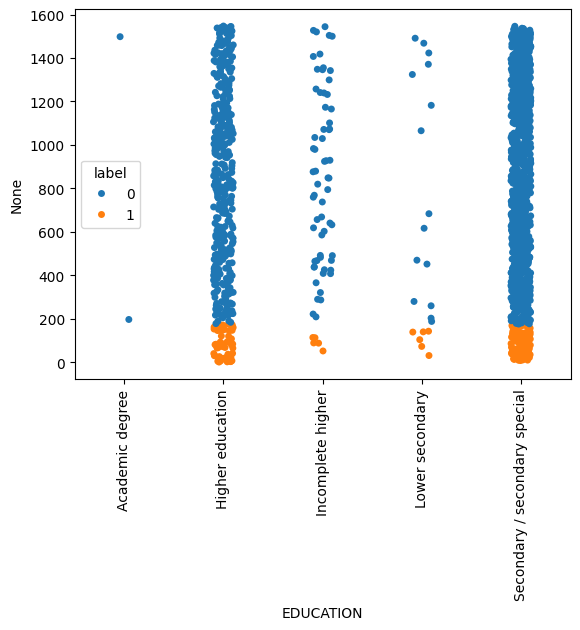

In [50]:
merged_data_1['EDUCATION'] = pd.Categorical(merged_data_1['EDUCATION'])

# Use stripplot for categorical x-axis
sns.stripplot(data=merged_data_1, x="EDUCATION", y=merged_data_1.index, hue="label")
plt.xticks(rotation=90)
plt.show()

In [51]:
fig = px.scatter(merged_data_1, x='Annual_income', y='Employment_years', color='label', title='Annual Income vs Employment Years')
fig.show()

In [52]:
fig = px.scatter_matrix(merged_data_1, dimensions=['Annual_income', 'Employment_years', 'Birth_year'], color='label')
fig.show()

In [63]:
fig = px.bar(merged_data_1, x='GENDER', color='Type_Income', facet_col='label', title='Distribution of Gender and Income Type by Label')
fig.show()

In [54]:
fig = px.box(merged_data_1, x='Type_Income', y='Annual_income', color='label', title='Annual Income by Type of Income')
fig.show()

In [56]:
fig = px.histogram(merged_data_1, x='Annual_income', color='label', title='Distribution of Annual Income')
fig.show()

In [57]:
fig = px.sunburst(merged_data_1, path=['GENDER', 'Type_Income', 'EDUCATION'], color='label', title='Sunburst of Gender, Income Type, and Education')
fig.show()

In [58]:
fig = px.scatter_3d(merged_data_1, x='Annual_income', y='Employment_years', z='Birth_year', color='label', title='3D Scatter Plot of Income, Employment Years, and Birth Year')
fig.show()

In [59]:
fig = px.pie(merged_data_1, names='Type_Income', color='Type_Income', title='Income Type Distribution')
fig.show()

In [60]:
fig = px.line(merged_data_1.sort_values('Birth_year'), x='Birth_year', y='Annual_income', color='label', title='Annual Income by Birth Year')
fig.show()

In [64]:
fig = px.bar(merged_data_1, x='Type_Income', color='EDUCATION', facet_col='label', title='Faceted Bar Plot by Label')
fig.show()

In [68]:
import plotly.express as px

# Grouping by 'EDUCATION', 'Family_Members', and 'label'
grouped_data = merged_data_1.groupby(['EDUCATION', 'Family', 'label'])[['Annual_income', 'Employment_years', 'Birth_year', 'Employed_days']].mean().reset_index()

# Create a heatmap with faceting by 'label'
fig = px.density_heatmap(grouped_data,
                         x='EDUCATION',
                         y='Family',
                         z='Annual_income',  # Change to other numerical columns if needed

                         facet_col='label',  # Facet by 'label' for separate heatmaps
                         title='Heatmap with Facets by Label')
fig.show()


In [69]:
merged_data_1.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'Family',
       'Type_Occupation', 'Employment_years', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birth_year',
       'Employed_days', 'Work_Phone', 'Mobile_phone', 'Phone', 'EMAIL_ID',
       'label'],
      dtype='object')

In [70]:
merged_data_1.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,Family,Type_Occupation,Employment_years,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birth_year,Employed_days,Work_Phone,Mobile_phone,Phone,EMAIL_ID,label
0,5008827,M,Y,Y,2,other,0.000000,180000.00000,Pensioner,Higher education,Married,House / apartment,51.394935,365243,0,1,0,0,1
1,5009744,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1
2,5009746,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,43.916063,-586,1,1,1,0,1
3,5009749,F,Y,N,2,other,1.605479,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1
4,5009752,F,Y,N,2,other,1.605479,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.117043,-586,1,1,1,0,1


In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables if not already encoded
label_encoder = LabelEncoder()
categorical_columns = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Occupation','Type_Income', 'EDUCATION','Marital_status','Housing_type','Work_Phone', 'Family']  # Example
for col in categorical_columns:
    merged_data_1[col] = label_encoder.fit_transform(merged_data_1[col])

# Define X (features) and y (target)
X = merged_data_1[categorical_columns]  # Feature columns
y = merged_data_1['label']  # Target column (approval for card)

# Apply SelectKBest with Chi-Square test
selector = SelectKBest(score_func=chi2, k='all')  # k='all' to see scores for all features
selector.fit(X, y)

# Get the scores for each feature
scores = selector.scores_

# Display feature names and scores
feature_scores = pd.DataFrame({'Feature': categorical_columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


           Feature     Score
4      Type_Income  6.157378
6   Marital_status  3.470022
0           GENDER  2.043506
9           Family  1.861453
5        EDUCATION  0.670637
1        Car_Owner  0.200587
2    Propert_Owner  0.172496
8       Work_Phone  0.060863
3  Type_Occupation  0.015807
7     Housing_type  0.002877


In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Define X (numerical features) and y (target)
numerical_columns = ['Annual_income', 'Employed_days', 'Employment_years', 'Birth_year']  # Example
X_numerical = merged_data_1[numerical_columns]
y = merged_data_1['label']

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')  # k='all' to see scores for all features
selector.fit(X_numerical, y)

# Get the scores for each feature
scores = selector.scores_

# Display feature names and scores
feature_scores = pd.DataFrame({'Feature': numerical_columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


            Feature      Score
2  Employment_years  14.688747
3        Birth_year   3.113419
1     Employed_days   1.526605
0     Annual_income   1.117399


In [73]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

# Define your features (X) and target (y)
X = merged_data_1[[ 'GENDER', 'Car_Owner', 'Propert_Owner', 'Family',
       'Type_Occupation', 'Employment_years', 'Annual_income', 'Type_Income',
       'EDUCATION', 'Marital_status', 'Housing_type', 'Birth_year',
       'Employed_days', 'Work_Phone', 'Mobile_phone', 'Phone', 'EMAIL_ID']]  # Example features
y = merged_data_1['label']  # Target variable (approval for card)

# Apply SelectKBest with Mutual Information
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # k='all' to see all feature scores
selector.fit(X, y)

# Get the scores for each feature
scores = selector.scores_

# Display feature names and scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores.sort_values(by='Score', ascending=False))


             Feature     Score
11        Birth_year  0.060545
12     Employed_days  0.050752
5   Employment_years  0.046291
6      Annual_income  0.011865
10      Housing_type  0.009542
4    Type_Occupation  0.008309
7        Type_Income  0.005993
3             Family  0.004589
16          EMAIL_ID  0.004161
8          EDUCATION  0.002921
1          Car_Owner  0.002497
15             Phone  0.002356
0             GENDER  0.001281
9     Marital_status  0.000000
2      Propert_Owner  0.000000
13        Work_Phone  0.000000
14      Mobile_phone  0.000000


In [75]:
# Select the top K features (e.g., K=5)
top_k = 7
top_k_features = feature_scores.nlargest(top_k, 'Score')
print("Top", top_k, "Features:")
print(top_k_features)


Top 7 Features:
             Feature     Score
11        Birth_year  0.060545
12     Employed_days  0.050752
5   Employment_years  0.046291
6      Annual_income  0.011865
10      Housing_type  0.009542
4    Type_Occupation  0.008309
7        Type_Income  0.005993


. Hypothesis: Gender affects the label

H₀: The label is independent of gender (no association between gender and label).

H₁: The label is dependent on gender (there is an association between gender and label).


In [76]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(merged_data_1['GENDER'], merged_data_1['label'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Gender affects the label")
else:
    print("Fail to Reject H₀: Gender does not affect the label")


Chi-Square Test Statistic: 2.935630436512684
P-value: 0.08664483091132888
Fail to Reject H₀: Gender does not affect the label


2. Hypothesis: Annual Income correlates with the label

H₀: Annual Income has no correlation with the label.

H₁: Annual Income is correlated with the label.


In [77]:
from scipy.stats import pointbiserialr

# Calculate Point-Biserial Correlation
corr, p = pointbiserialr(merged_data_1['Annual_income'], merged_data_1['label'])

print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Annual Income correlates with the label")
else:
    print("Fail to Reject H₀: Annual Income does not correlate with the label")


Correlation Coefficient: 0.026874624684256658
P-value: 0.29064445820079027
Fail to Reject H₀: Annual Income does not correlate with the label


3. Hypothesis: Type of Income influences the label

H₀: The label is independent of Type of Income.

H₁: The label is dependent on Type of Income.


In [78]:
# Create a contingency table
contingency_table = pd.crosstab(merged_data_1['Type_Income'], merged_data_1['label'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Type of Income affects the label")
else:
    print("Fail to Reject H₀: Type of Income does not affect the label")


Chi-Square Test Statistic: 13.598555653674126
P-value: 0.003505783928580882
Reject H₀: Type of Income affects the label


. Hypothesis: Education Level affects the label

H₀: Education level has no impact on the label.

H₁: Education level influences the label.

In [79]:
from scipy.stats import f_oneway

# Split data by label
group_0 = merged_data_1[merged_data_1['label'] == 0]['EDUCATION']
group_1 = merged_data_1[merged_data_1['label'] == 1]['EDUCATION']

# Perform ANOVA
f_stat, p = f_oneway(group_0, group_1)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Education level affects the label")
else:
    print("Fail to Reject H₀: Education level does not affect the label")



F-statistic: 1.1312039345706086
P-value: 0.2876847776548332
Fail to Reject H₀: Education level does not affect the label


5. Hypothesis: Housing Type affects the label

H₀: Housing Type has no relationship with the label.

H₁: Housing Type is related to the label.

In [80]:
# Create a contingency table
contingency_table = pd.crosstab(merged_data_1['Housing_type'], merged_data_1['label'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Housing Type affects the label")
else:
    print("Fail to Reject H₀: Housing Type does not affect the label")


Chi-Square Test Statistic: 28.04279521603185
P-value: 3.570429275146809e-05
Reject H₀: Housing Type affects the label


6. Hypothesis: Employment Years correlate with the label

H₀: Employment Years has no correlation with the label.

H₁: Employment Years is correlated with the label.

In [81]:
# Calculate Point-Biserial Correlation
corr, p = pointbiserialr(merged_data_1['Employment_years'], merged_data_1['label'])

print(f"Correlation Coefficient: {corr}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Employment Years correlates with the label")
else:
    print("Fail to Reject H₀: Employment Years does not correlate with the label")


Correlation Coefficient: -0.0970139598326038
P-value: 0.00013188299575641257
Reject H₀: Employment Years correlates with the label


7. Hypothesis: Family Size affects the label

H₀: Family size has no effect on the label.

H₁: Family size affects the label.

In [83]:
from scipy.stats import ttest_ind

# Split data by label
group_0 = merged_data_1[merged_data_1['label'] == 0]['Family']
group_1 = merged_data_1[merged_data_1['label'] == 1]['Family']

# Perform t-test
t_stat, p = ttest_ind(group_0, group_1)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p}")
if p < 0.05:
    print("Reject H₀: Family size affects the label")
else:
    print("Fail to Reject H₀: Family size does not affect the label")


T-statistic: 1.1034556586056645
P-value: 0.27000106327426987
Fail to Reject H₀: Family size does not affect the label


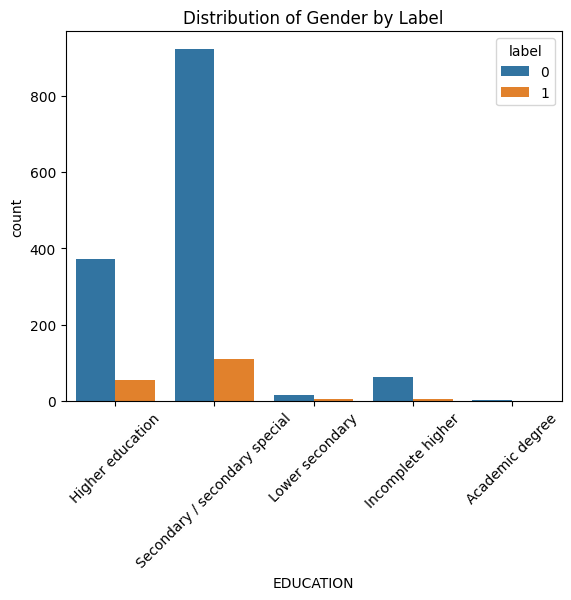

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Visualizing Gender and Label
sns.countplot(data=merged_data, x='EDUCATION', hue='label')
plt.title("Distribution of Gender by Label")
plt.xticks(rotation=45)
plt.show()


In [90]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

In [89]:
merged_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label,Birth_year,Employment_years,Family
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,1,0,0,0,other,2,1,51.394935,0.000000,2
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,other,2,1,37.117043,1.605479,2
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,other,2,1,43.916063,1.605479,2
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,other,2,1,37.117043,1.605479,2
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,1,1,0,other,2,1,37.117043,1.605479,2


In [91]:
merged_data.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label', 'Birth_year', 'Employment_years', 'Family'],
      dtype='object')

In [92]:
# Load dataset (replace 'data.csv' with your file)
df = merged_data


# Encode categorical variables
label_encoders = {}
for col in ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Type_Occupation','Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Standardize numerical features
scaler = StandardScaler()
df[['Annual_income', 'Employment_years','Birth_year']] = scaler.fit_transform(df[['Annual_income', 'Employment_years','Birth_year']])

# Feature-target split
X = df.drop(columns=['label'])
y = df['label']

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.59      0.50      0.54       276
           1       0.57      0.65      0.60       274

    accuracy                           0.58       550
   macro avg       0.58      0.58      0.57       550
weighted avg       0.58      0.58      0.57       550

ROC-AUC: 0.6298661800486617


In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       276
           1       0.94      0.93      0.94       274

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550

ROC-AUC: 0.9776988786628583


In [95]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]))


XGBoost Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       276
           1       0.94      0.94      0.94       274

    accuracy                           0.94       550
   macro avg       0.94      0.94      0.94       550
weighted avg       0.94      0.94      0.94       550

ROC-AUC: 0.977150111075849


In [96]:
from sklearn.svm import SVC

svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1]))


SVM Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       276
           1       0.50      1.00      0.67       274

    accuracy                           0.50       550
   macro avg       0.25      0.50      0.33       550
weighted avg       0.25      0.50      0.33       550

ROC-AUC: 0.4438670263408442


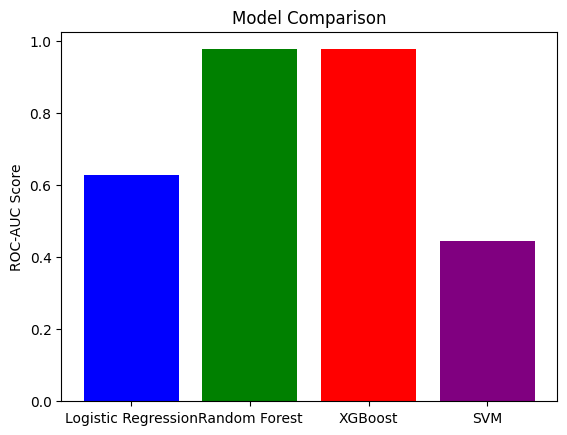

In [97]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'SVM']
roc_auc_scores = [
    roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
]

plt.bar(models, roc_auc_scores, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("ROC-AUC Score")
plt.title("Model Comparison")
plt.show()
